# Photo Classifier: Model evaluation

## Imports

In [1]:
import random
import numpy as np
import pandas as pd
from collections import Counter

In [2]:
from file_io import load_pickle_file
from constants import MODEL_FILE_PATH
from image_transforms import IMAGE_TRANSFORMS
from prediction import predict, calculate_accuracy
from plotting import visualize_prediction

In [3]:
import random
random.seed(42)

In [4]:
DATA_SET = 'test'

## Load model and data

In [5]:
model_data = load_pickle_file(MODEL_FILE_PATH)
model = model_data['model']
image_data = model_data['data']

## Model evaluation

### Accuracy

In [6]:
x = image_data.get_images(DATA_SET)
y_true = image_data.get_classes(DATA_SET)

In [7]:
y_pred, p = predict(x, model, IMAGE_TRANSFORMS[DATA_SET])

In [8]:
calculate_accuracy(y_true, y_pred)

0.9090909090909091

In [9]:
test_data_labels = image_data.get_labels(DATA_SET)
is_correct = (y_true==y_pred).tolist()
df_is_correct = pd.DataFrame(dict(label=test_data_labels,is_correct=is_correct))
accuracy_by_label = df_is_correct.groupby('label', as_index=False).mean()

In [10]:
training_data_labels = image_data.get_labels('training')
n_samples_per_class_in_training_data = dict(Counter(training_data_labels))
accuracy_by_label['n_train'] = accuracy_by_label['label'].apply(lambda x: n_samples_per_class_in_training_data[x])

In [11]:
accuracy_by_label.sort_values('is_correct', inplace=True)

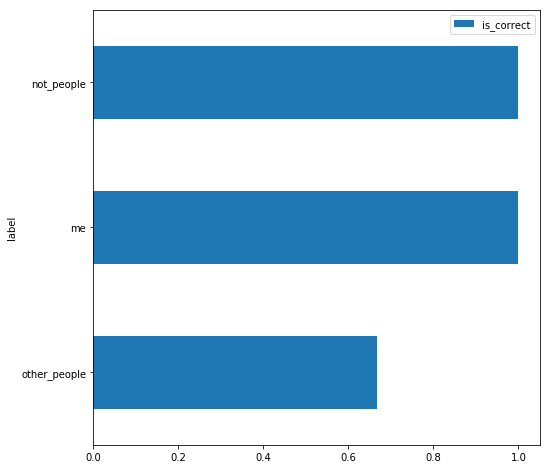

In [12]:
_ = accuracy_by_label.plot.barh(x='label', y='is_correct', figsize=(8,8))

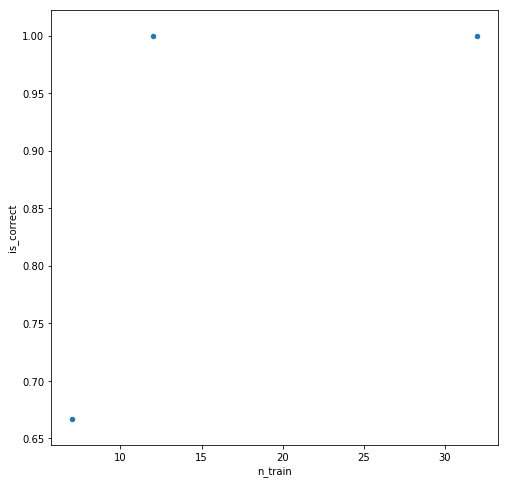

In [13]:
_ = accuracy_by_label.plot.scatter(x='n_train', y='is_correct', figsize=(8,8))

In [14]:
accuracy_by_label

,label,is_correct,n_train
2,other_people,0.666667,7
0,me,1.000000,12
1,not_people,1.000000,32


In [15]:
df_is_correct[df_is_correct.is_correct == False]

,label,is_correct
4,other_people,False
5,other_people,False


### Example predictions

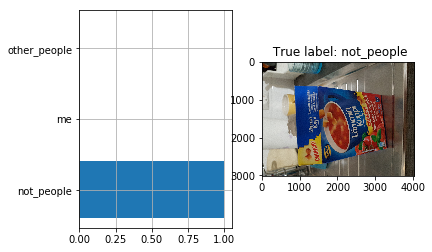

In [16]:
test_index = 0

image = image_data.get_image(test_index, DATA_SET)
true_label = image_data.get_label(test_index, DATA_SET)
probabilities = p[test_index]
i_sorted = np.argsort(probabilities)[::-1][:5]
prob = probabilities[i_sorted]
labels_predicted = image_data.convert_classes_to_labels(i_sorted)

visualize_prediction(image,
                     true_label, 
                     labels_predicted, 
                     prob)